In [130]:
import numpy as np
import pandas as pd

In [131]:
seed = 7
np.random.seed(seed)
dataset = pd.read_csv(r'zurich.csv')
dataset.dropna(inplace=True)

In [132]:
dataset.head()

,date,pm10,hour,T,P,wind,hum,traffic
0,19/08/2017 16:00,5.07,16,22.45,969.32,2.60,52,431.428571
1,19/08/2017 17:00,5.40,17,22.28,969.42,2.99,50,425.714286
2,19/08/2017 18:00,5.92,18,21.70,969.85,2.59,48,364.000000
3,19/08/2017 19:00,6.12,19,20.69,970.32,1.97,48,248.285714
4,19/08/2017 20:00,6.56,20,19.65,971.09,1.60,48,174.285714


In [133]:
# dataset['previousPM2'] = dataset['pm2.5'].shift(2)

In [134]:
# dataset['previousPM3'] = dataset['pm2.5'].shift(3)

In [135]:
# dataset['previousPM4'] = dataset['pm2.5'].shift(4)

In [136]:
# dataset['previousPM5'] = dataset['pm2.5'].shift(5)

In [137]:
dataset.dropna(inplace=True)

In [138]:
dataset.head()

,date,pm10,hour,T,P,wind,hum,traffic
0,19/08/2017 16:00,5.07,16,22.45,969.32,2.60,52,431.428571
1,19/08/2017 17:00,5.40,17,22.28,969.42,2.99,50,425.714286
2,19/08/2017 18:00,5.92,18,21.70,969.85,2.59,48,364.000000
3,19/08/2017 19:00,6.12,19,20.69,970.32,1.97,48,248.285714
4,19/08/2017 20:00,6.56,20,19.65,971.09,1.60,48,174.285714


In [139]:
data = dataset.values

In [140]:
data

array([['19/08/2017 16:00', 5.07, 16, ..., 2.6, 52, 431.42857139999995],
       ['19/08/2017 17:00', 5.4, 17, ..., 2.99, 50, 425.7142857],
       ['19/08/2017 18:00', 5.92, 18, ..., 2.59, 48, 364.0],
       ..., 
       ['25/08/2017 21:00', 16.35, 21, ..., 1.34, 67, 204.8571429],
       ['25/08/2017 22:00', 19.08, 22, ..., 0.97, 67, 195.4285714],
       ['25/08/2017 23:00', 15.31, 23, ..., 1.46, 77, 146.8571429]], dtype=object)

In [141]:
### split the data into training and test data

In [142]:
from sklearn.model_selection import train_test_split

In [143]:
# for now, simple univariate linear regression: traffic -> PM10

In [144]:
size = data[0].size
X = data[:,7]  # traffic
y = data[:,1]  # PM10

In [145]:
X = X.reshape(X.shape[0],1)
# necessary to reshape the array since the regression model
# expects an array of size (?,1)
X.shape

(151, 1)

In [146]:
y = y.reshape(y.shape[0],1)
y.shape

(151, 1)

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [148]:
from sklearn import datasets, linear_model

In [149]:
regr = linear_model.LinearRegression()

In [150]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [151]:
prediction = regr.predict(X_test)

In [152]:
from sklearn.metrics import mean_squared_error, r2_score

In [153]:
# The mean squared error
print("Mean squared error: {}".format(mean_squared_error(y_test, prediction)))
# Variance score: 1 is perfect prediction
print('Variance score: {}'.format(r2_score(y_test, prediction)))


Mean squared error: 24.430024732941273
Variance score: 0.23527448058374312


In [154]:
# plotting the correlations

In [155]:
import matplotlib.pyplot as plt


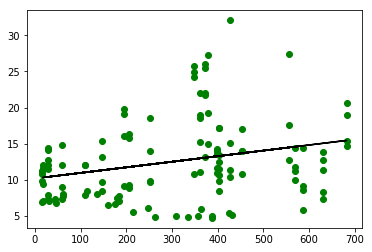

In [156]:
plt.scatter(X_train, y_train,color='g')
plt.plot(X_test, prediction,color='k')

plt.show()